In [1]:
# run models notebook -- similar to import
%run models.ipynb

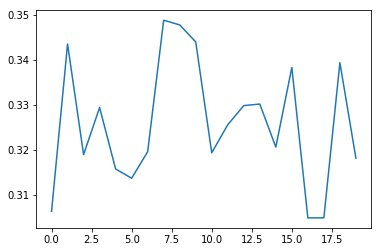

In [2]:
# training different linear models
## baseline model
model, variables = create_linear_classifier(data,death,optimizer_name="adam",learning_rate= 0.1,
                                                batch_size=16)
train_model(model,variables, epochs = 20)

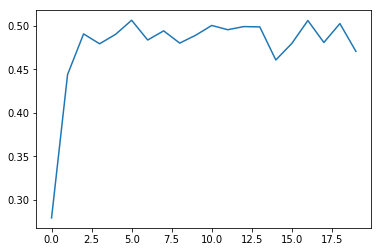

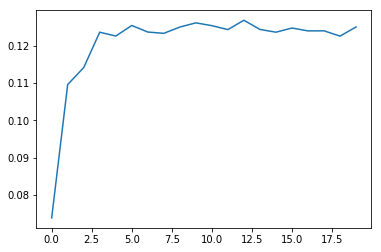

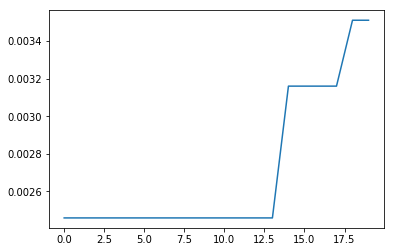

TypeError: create_linear_classifier() got an unexpected keyword argument 'epochs'

In [4]:
# vary learning rate

## learning rate = 0.01
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.01,
                                              batch_size=16)
train_model(model,variables,epochs=20)

## learning rate = 0.001
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.001,
                                              batch_size=16)
train_model(model,variables,epochs=20)

## learning rate = 0.0001
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.0001,
                                              batch_size=16)
train_model(model,variables,epochs=20)

## learning rate = 0.00001
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.00001,
                                              batch_size=16,epochs=20)
train_model(model,variables)

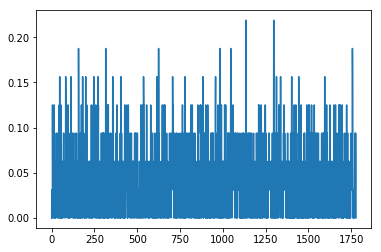

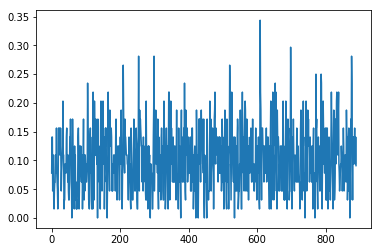

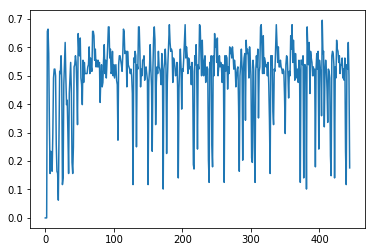

In [6]:
# vary batch size

## size = 32
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.1,
                                              batch_size=32,epochs=20)
train_model(model,variables)

## size = 64
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.1,
                                              batch_size=64,epochs=20)
train_model(model,variables)

## size = 128
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.1,
                                              batch_size=128,epochs=20)
train_model(model,variables)

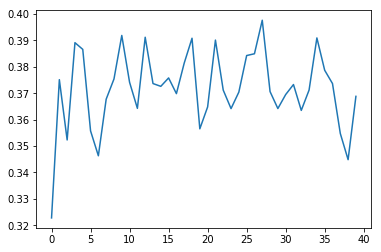

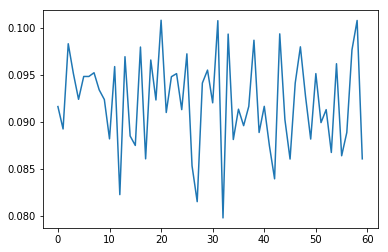

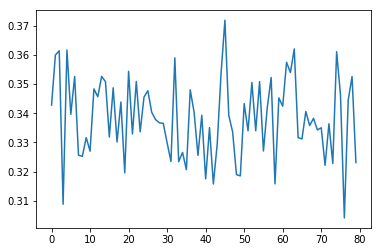

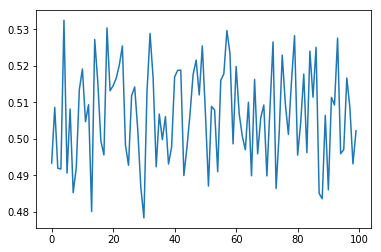

In [9]:
# vary epochs
## epochs = 40
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate= 0.1,
                                                batch_size=16)
train_model(model,variables,epochs=40)

## epochs = 60
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate= 0.1,
                                                batch_size=16)
train_model(model,variables,epochs=60)

## epochs = 80
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate= 0.1,
                                                batch_size=16)
train_model(model,variables,epochs=80)

## epochs = 100
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate= 0.1,
                                                batch_size=16)
train_model(model,variables,epochs=100)

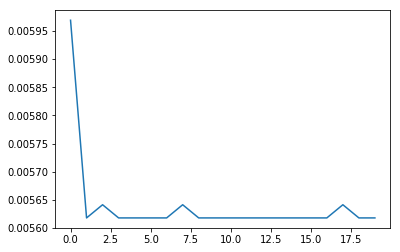

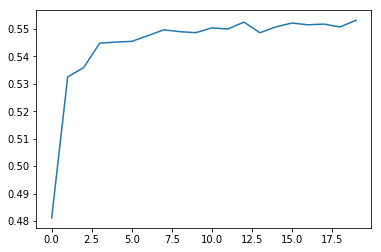

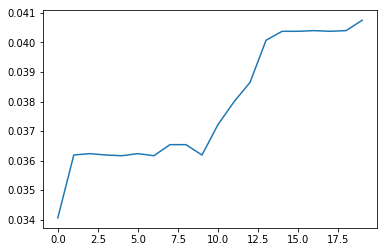

In [11]:
# vary optimizer
## Gradient Descent
model, variables = create_linear_classifier(data,death,optimizer_name="GD",learning_rate= 0.1,
                                                batch_size=16)
train_model(model,variables,epochs=20)

## Adagrad
model, variables = create_linear_classifier(data,death,optimizer_name="Adagrad",learning_rate= 0.1,
                                                batch_size=16)
train_model(model,variables,epochs=20)

## Adadelta
model, variables = create_linear_classifier(data,death,optimizer_name="Adadelta",learning_rate= 0.1,
                                                batch_size=16)
train_model(model,variables,epochs=20)

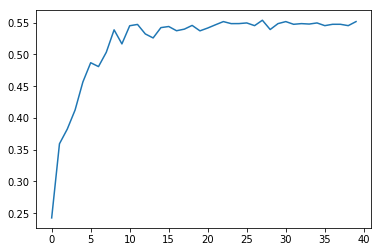

In [12]:
## learning rate = 0.1, batch size = 128, epochs = 40, optimizer = Adagrad
model, variables = create_linear_classifier(data,death,optimizer_name="Adagrad",learning_rate= 0.1,
                                                batch_size=128)
train_model(model,variables,epochs=40)

Conclusion: not very strong model. The best training accuracy I could get converges at 50%-60% accuracy.